In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.image as mping

In [103]:
import cv2
print(cv2.__version__)

4.10.0


In [104]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [105]:
tf.random.set_seed(3)

## Load Data

In [106]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [107]:
X_train.shape

(60000, 28, 28)

In [108]:
X_test.shape #it says there are 10000 images of size 28x8, grayscale image
#y_train.shape

(10000, 28, 28)

In [16]:
type(y_train)

numpy.ndarray

In [109]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

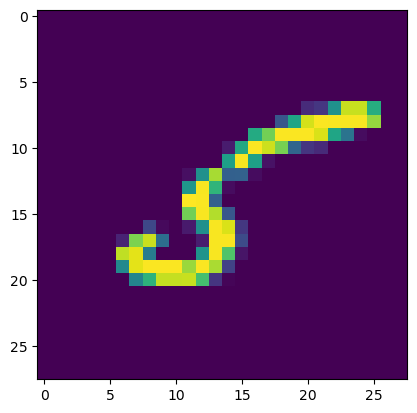

5


In [110]:
plt.imshow(X_train[11])
plt.show()

print(y_train[11])

## Image Labels

In [111]:
#unique

print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#here all images have same dimensions, so we don't need to resize it then

## Scaling

In [112]:
X_train=X_train/255
X_test=X_test/255

#it ranges from 0-1 now

## Neural Networks

In [134]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train,validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8342 - loss: 0.5630 - val_accuracy: 0.9577 - val_loss: 0.1454
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9541 - loss: 0.1558 - val_accuracy: 0.9703 - val_loss: 0.1127
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9668 - loss: 0.1090 - val_accuracy: 0.9708 - val_loss: 0.1011
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9739 - loss: 0.0858 - val_accuracy: 0.9728 - val_loss: 0.0976
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9783 - loss: 0.0691 - val_accuracy: 0.9720 - val_loss: 0.0973
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9825 - loss: 0.0569 - val_accuracy: 0.9722 - val_loss: 0.1024
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9855 - loss: 0.0476 - val_accuracy: 0.9738 - val_loss: 0.1002
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9881 - loss: 0.0395 - 

Accuracy of training data is 99%

In [135]:
loss,accuracy=model.evaluate(X_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9622 - loss: 0.1407
0.9670000076293945


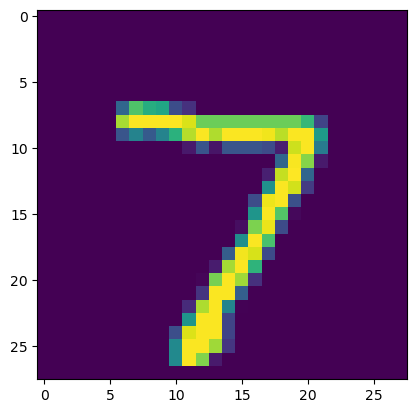

In [136]:
plt.imshow(X_test[0])

In [116]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [137]:
print(y_pred.shape)

(10000, 10)


In [138]:
print(y_pred[0]) #probability

[1.2029115e-02 3.1879474e-03 6.0979147e-03 9.3427348e-01 2.4597817e-05
 8.3662861e-04 5.9535671e-07 9.9991363e-01 3.3649769e-02 4.0517113e-01]


In [139]:
predicted_number=np.argmax(y_pred[0])

In [140]:
print(predicted_number)

7


In [141]:
predicted_numbers=[np.argmax(i) for i in y_pred]

#print(predicted_numbers)

## Confusion Matrix

In [32]:
conf_mat=confusion_matrix(y_test,predicted_numbers)

In [33]:
print(conf_mat)

tf.Tensor(
[[ 964    0    2    4    0    0    2    1    5    2]
 [   0 1119    3    2    0    0    1    0    9    1]
 [   5    3  991   16    0    0    0    6   10    1]
 [   0    0    2  994    0    3    0    3    5    3]
 [   2    2    4    2  930    0    9    5    2   26]
 [   4    0    0   20    2  854    4    0    8    0]
 [   9    3    2    3    6   20  908    0    7    0]
 [   0    2    7    8    0    0    0 1006    2    3]
 [   4    1    1   12    1    4    0    8  940    3]
 [   3    3    0   12    4    3    0   12    3  969]], shape=(10, 10), dtype=int32)


Text(595.7222222222223, 0.5, 'Actual Label')

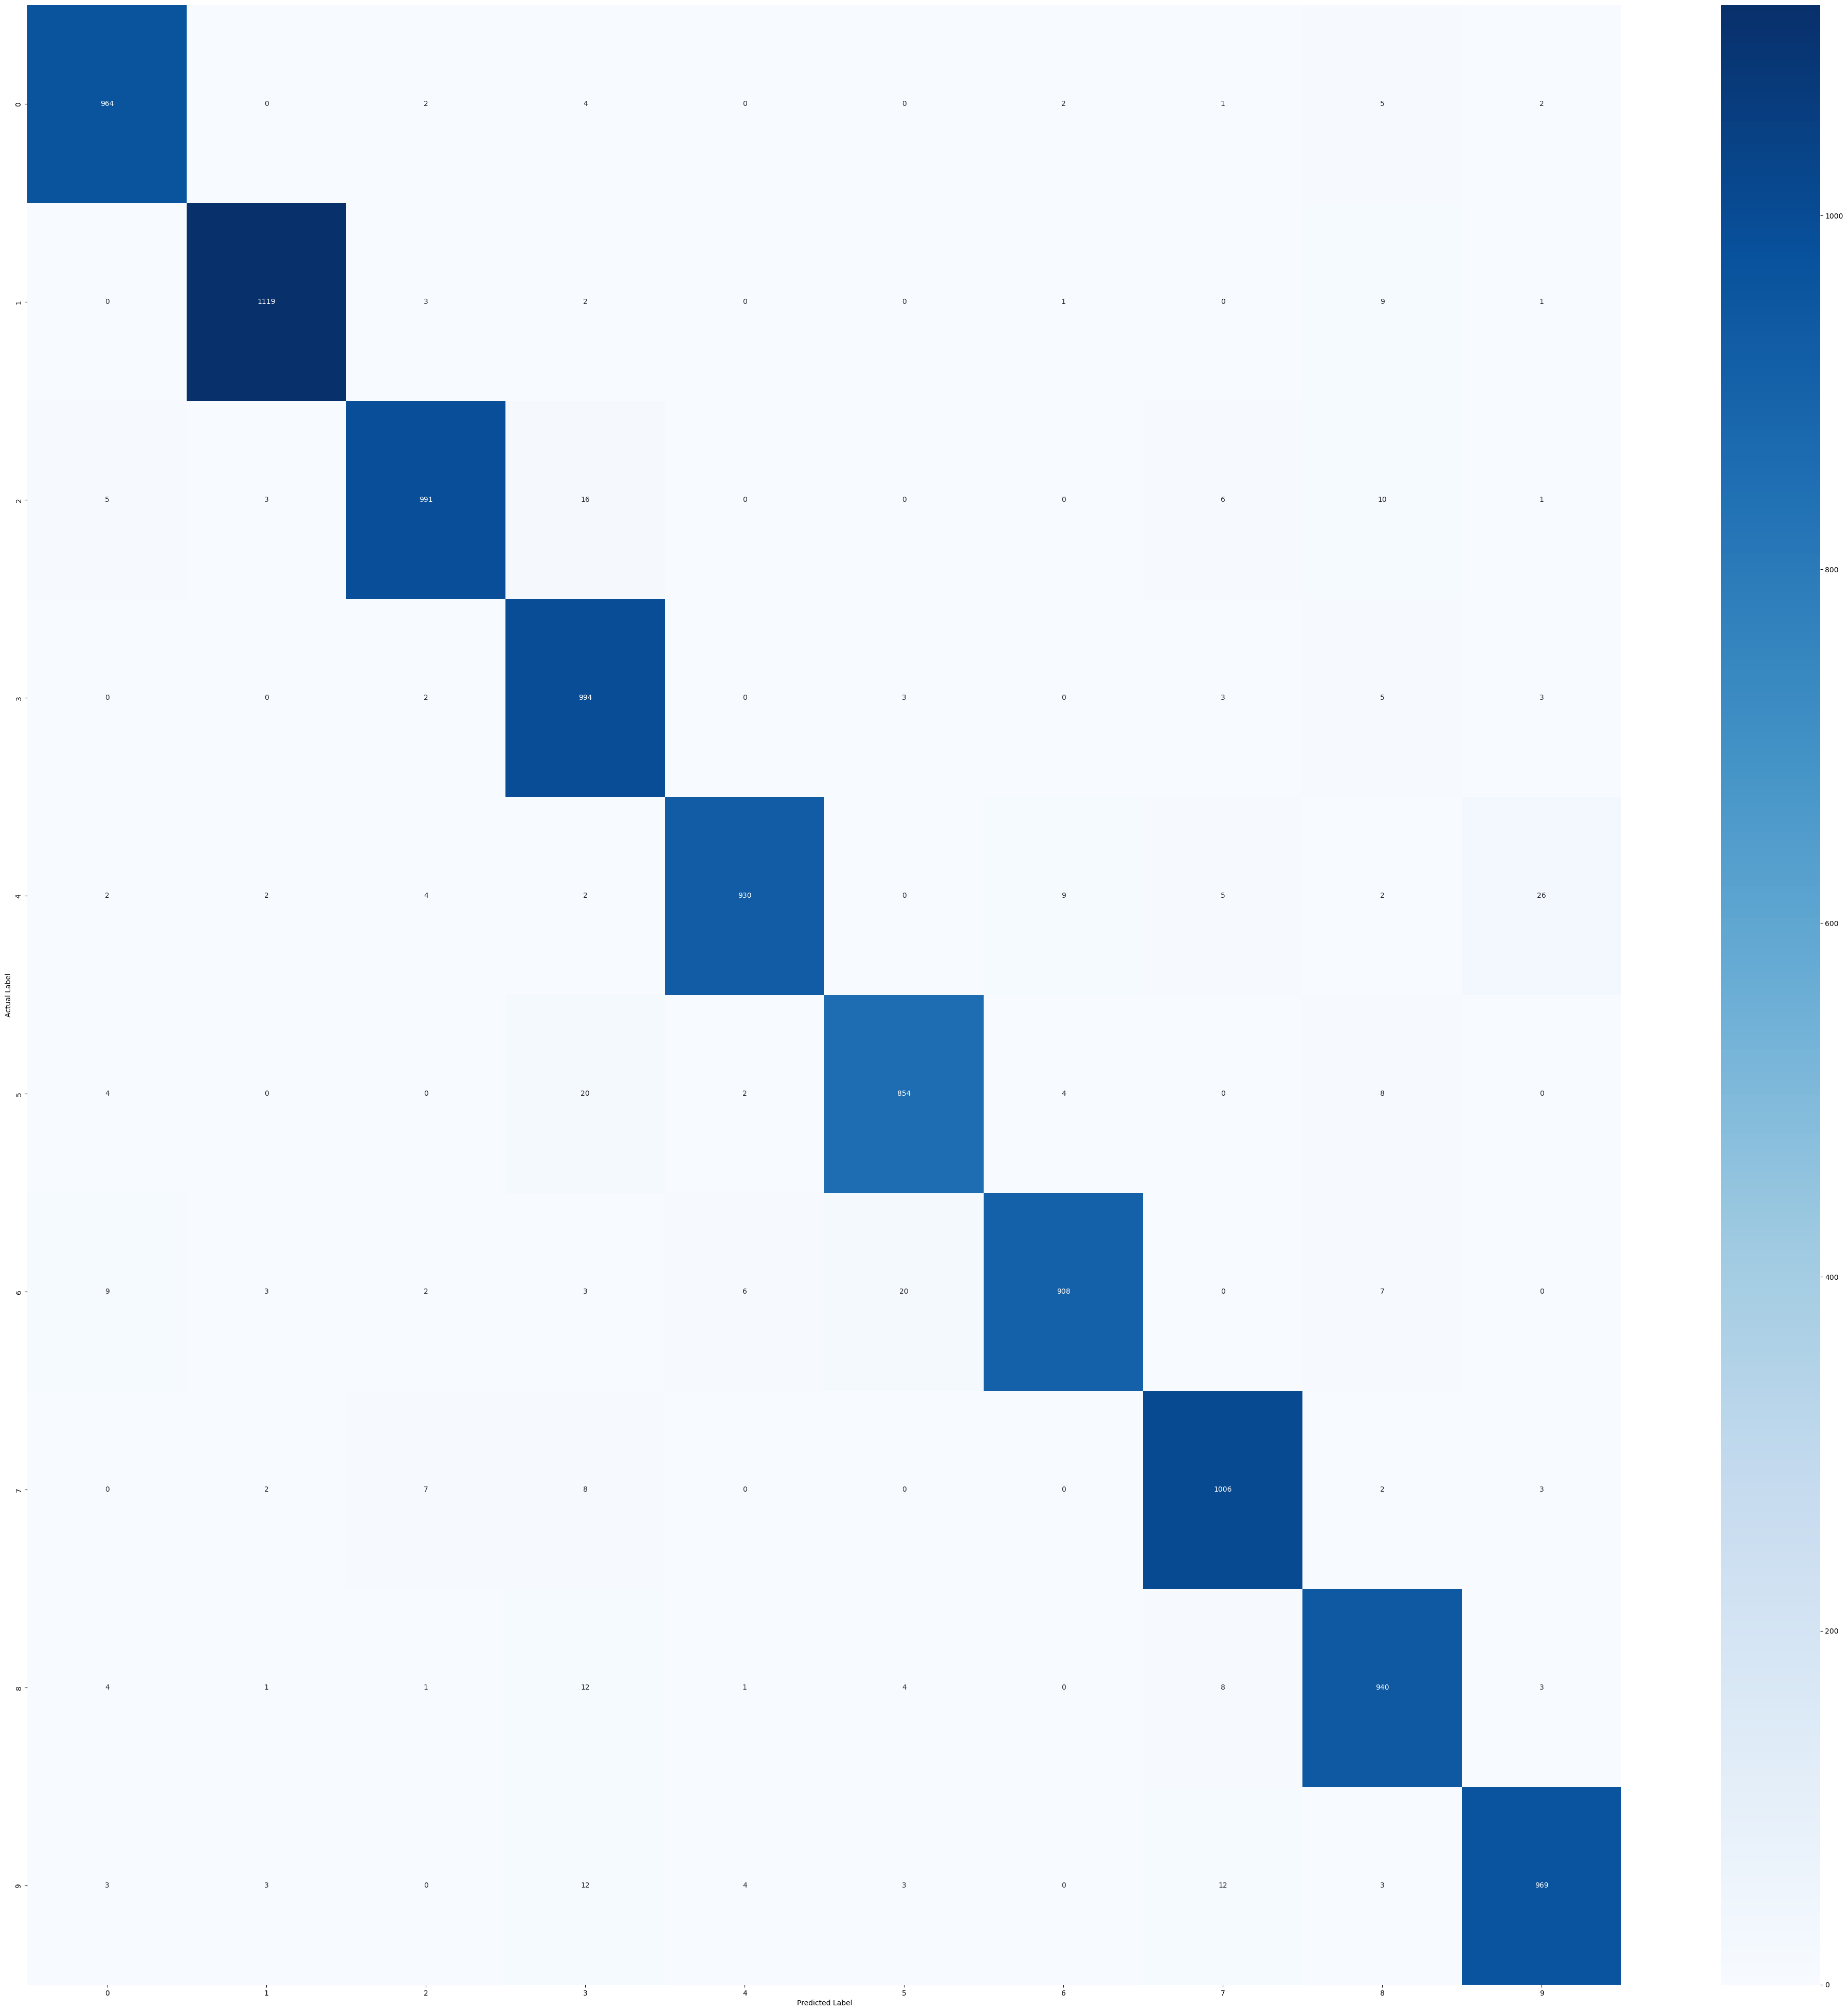

In [41]:
plt.figure(figsize=(50,50))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Predicting

In [142]:
input_image_path='images_3.jpg'

In [143]:
input_image=cv2.imread(input_image_path)

type(input_image)

numpy.ndarray

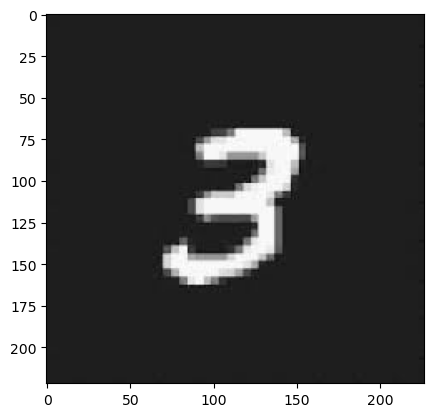

In [144]:
plt.imshow(input_image)

In [145]:
input_image.shape #rgb

(222, 227, 3)

In [146]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

In [147]:
#resize as the input datas are of dimensions 28x28

grayscale_image=cv2.resize(grayscale,(28,28))

In [148]:
grayscale_image.shape

(28, 28)

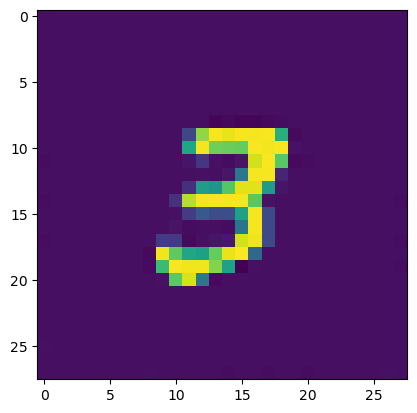

In [156]:
plt.imshow(grayscale_image)

In [150]:
grayscaled_image=grayscale_image/255 #scaling

In [151]:
image_reshaped=np.reshape(grayscaled_image,[1,28,28]) #we tell the nn that we are using only 1 image

In [158]:
y_prediction_final=model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [159]:
print(y_prediction_final)

[[4.1999258e-03 6.3779407e-06 5.8337194e-03 2.5728795e-01 2.0411851e-06
  7.6550763e-04 4.2506610e-05 4.3951881e-05 6.6470832e-01 6.7109674e-02]]


In [160]:
predicted_answer=np.argmax(y_prediction_final)

print(predicted_answer)

8
